Лабороторна робота 1.1 студента К. Д. Долматова

Варіант 3: Wine Quality Dataset

Опис: Прогнозування якості вина на основі його фізико-хімічних властивостей.

Джерело даних: UCI Wine Quality Dataset

Отримання та використання даних:
1.	Завантажте файл даних з https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
2.	Дані представлені у форматі CSV з розділювачем ";"
3.	Використовуйте pandas для завантаження даних:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

df = pd.read_csv(url, sep=';')

# Виберіть features (X) та цільову змінну (y)

X = df.drop('quality', axis=1).values

y = df['quality'].values

Рекомендовані параметри для початку:

•	w_init = np.zeros(X.shape[1])

•	b_init = 0

•	alpha = 0.0001

•	iterations = 2000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:
# Завантаження набору даних про якість червоного вина
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# Перегляд перших рядків
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Інформація про дані
print(df.info())

# Статистичний опис
print(df.describe())

# Перевірка на пропущені значення
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

In [ ]:
X = df.drop('quality', axis=1).values  # фізико-хімічні властивості
y = df['quality'].values               # якість (target)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Середньоквадратична помилка (MSE): {mse:.4f}")
print(f"Середня абсолютна помилка (MAE): {mae:.4f}")
print(f"Коефіцієнт детермінації (R²): {r2:.4f}")


Середньоквадратична помилка (MSE): 0.3900
Середня абсолютна помилка (MAE): 0.5035
Коефіцієнт детермінації (R²): 0.4032


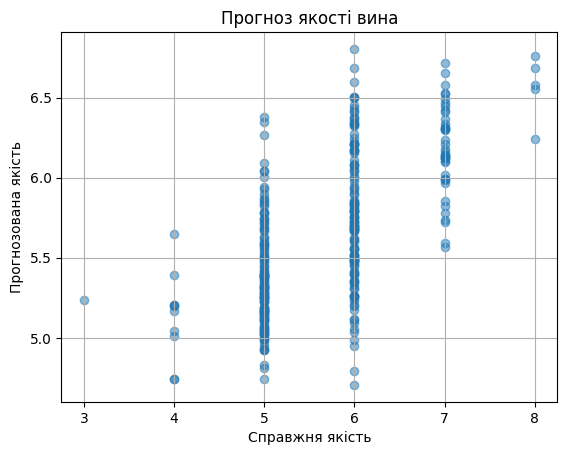

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Справжня якість")
plt.ylabel("Прогнозована якість")
plt.title("Прогноз якості вина")
plt.grid(True)
plt.show()


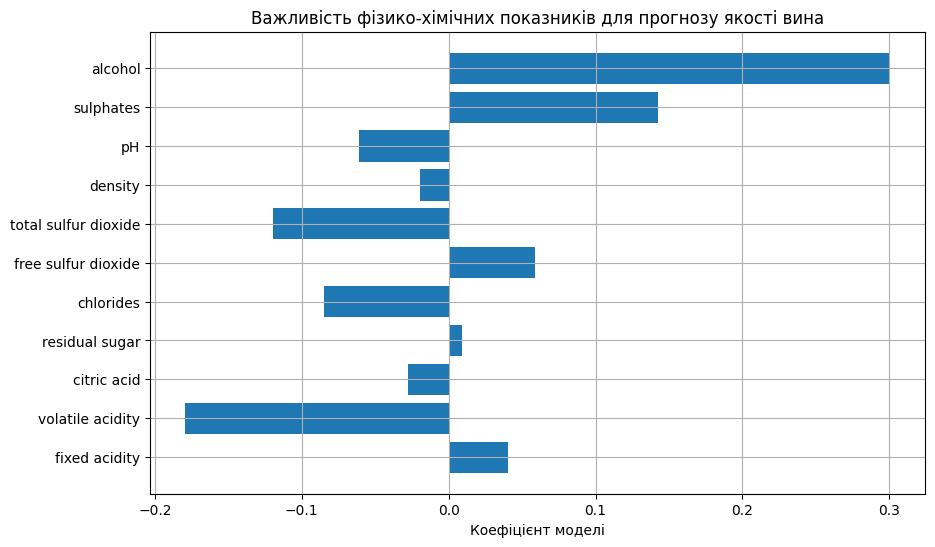

In [ ]:
feature_importance = model.coef_
columns = df.columns[:-1]

plt.figure(figsize=(10, 6))
plt.barh(columns, feature_importance)
plt.title("Важливість фізико-хімічних показників для прогнозу якості вина")
plt.xlabel("Коефіцієнт моделі")
plt.grid(True)
plt.show()


1. Які особливості має обраний вами набір даних? Які труднощі можуть виникнути при його аналізі?
Особливості:

Набір містить фізико-хімічні властивості вина (pH, кислотність, вміст алкоголю тощо).

Цільова змінна — якість вина (оцінка від 0 до 10).

Дані збалансовані нерівномірно: більшість зразків мають якість 5 або 6.

Труднощі:

Імбаланс класів: деякі оцінки зустрічаються рідко, що ускладнює побудову точних прогнозів.

Корельовані ознаки: частина ознак сильно пов’язані між собою.

Суб’єктивність міток: якість оцінюється людьми, тому можливі похибки.

2. Як впливає нормалізація даних на результати лінійної регресії?
Нормалізація призводить до того, що всі ознаки мають однаковий масштаб, що важливо для інтерпретації ваг коефіцієнтів.

Без нормалізації ознаки з більшими значеннями можуть домінувати над іншими.

Підвищується стабільність і швидкість збіжності градієнтного спуску.

3. Як визначити оптимальне значення швидкості навчання для градієнтного спуску?
Підбирається емпірично або за допомогою візуалізації функції втрат.

Маленьке значення → повільне навчання; занадто велике → нестабільне навчання або розбіжність.

Можна використовувати адаптивні алгоритми (наприклад, Adam, RMSProp) для автоматичного налаштування швидкості.

4. Що означає коефіцієнт при ознаці в лінійній регресії? Як інтерпретувати отримані коефіцієнти?
Кожен коефіцієнт показує, як зміниться цільова змінна при зміні ознаки на одиницю, якщо інші ознаки фіксовані.

Додатній коефіцієнт — збільшує прогноз, від’ємний — зменшує.

За модулем коефіцієнтів можна оцінити впливовість ознак на результат.

5. Які показники свідчать про успішне навчання моделі?
Високе значення коефіцієнта детермінації R² (близьке до 1).

Низькі значення MSE та MAE.

Прогнози незначно відхиляються від реальних значень.

Візуалізація (scatter plot) показує, що точки лежать близько до прямої y = x.

6. Які метрики використовуються для оцінки якості лінійної регресії?
MAE (Mean Absolute Error) – середня абсолютна похибка.

MSE (Mean Squared Error) – середньоквадратична похибка.

RMSE – корінь із MSE, зручніший для інтерпретації.

R² (коефіцієнт детермінації) – частка варіації, пояснена моделлю.

7. Як визначити, чи є проблема перенавчання (overfitting) у моделі?
Модель показує високу точність на тренувальних даних і низьку на тестових.

R² на train >> R² на test — типовий симптом перенавчання.

Візуально: модель “ідеально” підходить до навчальної вибірки, але помилки великі при нових даних.

8. Які переваги та недоліки лінійної регресії порівняно з іншими методами машинного навчання?
Переваги:

Проста, швидка, легко інтерпретується.

Потребує мало обчислювальних ресурсів.

Добре працює за лінійної залежності між ознаками та ціллю.

Недоліки:

Погано працює з нелінійними зв'язками.

Чутлива до викидів та мультиколінеарності.

Обмежена гнучкість — низька точність у складних задачах.

9. Як впливає кількість ознак на результати та швидкість навчання лінійної регресії?
Збільшення кількості ознак може покращити точність, якщо ознаки інформативні.

Але надто багато ознак → ризик перенавчання.

Також зростає час обробки та складність моделі.

Неінформативні або корельовані ознаки можуть погіршити результат.

10. Які модифікації можна внести в алгоритм градієнтного спуску для покращення його роботи?
Застосування адаптивних алгоритмів: Adam, RMSProp, Adagrad.

Використання momentum для прискорення збіжності.

Зменшення learning rate у міру навчання (learning rate scheduling).

Замість класичного градієнтного спуску — stochastic gradient descent (SGD) або mini-batch варіанти.